## Analyze A/B Test Results by Mahmoud Osama

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, We will be working to understand the results of an A/B test run by an e-commerce website. Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [25]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure we get the same answers on quizzes as Udacity team set up
random.seed(42)

`1.` Now, We read data in the `ab_data.csv` . Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [26]:
df=pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Use the cell below to find the number of rows in the dataset.

In [27]:
df.shape

(294478, 5)

**So, Number of Rows in this dataset =** ***<font color='green'>294478</font>***

c. The number of unique users in the dataset.

In [28]:
len(df['user_id'].unique())

290584

**So, Number of of unique users in this dataset =** ***<font color='green'>290584</font>***

d. The proportion of users converted.

In [29]:
df['converted'].mean()
print(" The proportion of users converted as percentage: "+"{:.2%}".format(round(df['converted'].mean(),2)))

 The proportion of users converted as percentage: 12.00%


**So, The proportion of users converted as percentage =** ***<font color='green'>12.00%</font>***

e. The number of times the `new_page` and `treatment` don't match.

In [30]:
treatment_nnew= df.query("group == 'treatment' and landing_page !='new_page'")
new_ntreatment= df.query("group != 'treatment' and landing_page =='new_page'")
total_mismatch= treatment_nnew + new_ntreatment
len(total_mismatch)


3893

**So, The number of times the new_page and treatment don't match =** ***<font color='green'>3893</font>***

f. Do any of the rows have missing values?

In [31]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

***<font color='green'>No</font>*** ,*We Don’t have any missing Values.*

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [32]:
df2 = df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')") 

In [33]:
# Double Check all of the unneeded rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3**.

a. How many unique **user_id**s are in **df2**?

In [34]:
len(df2['user_id'].unique())

290584

**So, Number of of unique users in df2 =** ***<font color='green'>290584</font>***

b. There is one **user_id** repeated in **df2**.  What is it?

In [35]:
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

**So, user_id repeated  in df2 =** ***<font color='green'>773192</font>***

c. What is the row information for the repeat **user_id**? 

In [36]:
df2[df2['user_id'].duplicated()]

user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [37]:
df2= df2.drop_duplicates(['user_id'],keep= 'first')

`4.` Use **df2** in the cells below to answer questions for **Quiz 4**.

a. What is the probability of an individual converting regardless of the page they receive?

In [38]:
df2['converted'].mean()

0.11959708724499628

**So, the probability of an individual converting regardless of the page =** ***<font color='green'>0.1196</font>***

b. Given that an individual was in the `control` group, what is the probability they converted?

In [39]:
df_control = df2.query("group == 'control'")
df_control['converted'].mean()

0.1203863045004612

**So, the probability of an individual in control group to convert =** ***<font color='green'>0.1204</font>***

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [40]:
df_treatment = df2.query("group == 'treatment'")
df_treatment['converted'].mean()

0.11880806551510564

**So, the probability of an individual in treatment group to convert =** ***<font color='green'>0.1188</font>***

d. What is the probability that an individual received the new page?

In [41]:
df_newpage = df2.query("landing_page == 'new_page'")
df_newpage['landing_page'].count()/df2['landing_page'].count()

0.5000619442226688

**So, the probability of an individual to recieve the new page =** ***<font color='green'>0.5001</font>***

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

***<font color='red'>NO, There is not sufficient evidence </font>*** 
as we will notice that :
- the probablity of individual in treatment group with the new page to convert <font color='red'> (0.1188) </font>  is less than the probablity of individual in control group with the old page to convert<font color='green'> (0.1204) </font>
- the probablity of recieving a new page overall is about the half.

***So, in conclusion The new treatment page didn’t lead to more conversions than the old page.***

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, we could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do we stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider we need to make the decision just based on all the data provided.  If we want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- Null hypothesis *H<sub>o</sub>* : **𝑝<sub>𝑜𝑙𝑑</sub>** >=  **𝑝<sub>new</sub>**
- Alternative hypothesis *H<sub>1</sub>* : **𝑝<sub>new</sub>** > **𝑝<sub>𝑜𝑙𝑑</sub>**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

**in the null hypothesis the converation of the old page doesn’t differ 
than the new one so, the whole data used to get the conversion rate 
of the newpage and vice versa**

In [42]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

**So, p_new under the null =** ***<font color='green'>0.1196</font>***

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [43]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

**So, p_old under the null =** ***<font color='green'>0.1196</font>***

c. What is $n_{new}$, the number of individuals in the treatment group?

In [44]:
n_new = df2.query("group=='treatment'").shape[0]
n_new

145310

**So, n_new =** ***<font color='green'>145310</font>***

d. What is $n_{old}$, the number of individuals in the control group?

In [45]:
n_old = df2.query("group=='control'").shape[0]
n_old

145274

**So, n_old =** ***<font color='green'>145274</font>***

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [46]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
new_page_converted

array([0, 0, 1, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [53]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [54]:
new_page_converted.mean() - old_page_converted.mean()

0.000913206663115021

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [55]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new).mean()
    old_page_converted = np.random.binomial(1,p_old,n_old).mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'Frequency')

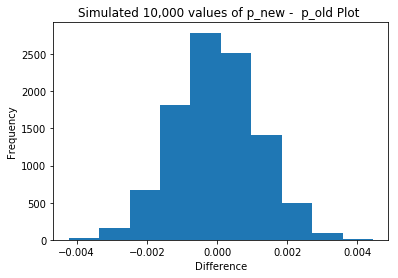

In [56]:
plt.hist(p_diffs)
plt.title('Simulated 10,000 values of p_new -  p_old Plot ')
plt.xlabel('Difference')
plt.ylabel('Frequency')


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [57]:
actual_diff= df_treatment['converted'].mean()- df_control['converted'].mean()
actual_diff

-0.0015782389853555567

In [58]:
p_diffs = np.array(p_diffs)
(actual_diff < p_diffs).mean()

0.9082

***So, <font color='green'>90.14%</font> is the proportion of the p_diffs that are greater than the actual difference observed in ab_data.csv.***

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- The value we calculated is called the **<font color='green'>P value</font>**
- Its scientific definition is **the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.**

**In conclusion as P value is pretty large, there is no enough evidence that new page caused more conversion than old page
and we can not reject the null hypothesis which suggests that old page is working almost the same as or better than the new page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [59]:
import statsmodels.api as sm
convert_old = df2.query(" landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]
print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [60]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [61]:
from scipy.stats import norm
# to get how significant z-score is:
print(norm.cdf(z_score))

# assumed at 95% confidence level, we calculate the critical value for the one sided case here as follow: 
print(norm.ppf(1-(0.05)))

0.9050583127590245
1.6448536269514722


#### The meaning for Z score and P-value in terms of conversion rates of old and new pages as follow:
- **Z score (1.3109) is less than the critical value of (1.6448).**
- **Null Hyponthesis is fully accepted and old page is working almost the same as or even better than the new page.**

#### Do they agree with the findings in parts j. and k.?

- **Yes, these values agree with the findings in parts j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**<font color='green'>Logistic Regression</font>** as there are only two possible outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [62]:
df2['intercept']=1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2=df2.drop('control',axis=1)
df2 = df2.rename(columns={'treatment': 'ab_page'})
df2.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page  
0          1        0  
1          1        0  
2          1        1  
3          1        1  
4          1        0

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [63]:
import statsmodels.api as sm
logit = sm.Logit(df2['converted'],df2[['intercept' ,'ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        12:47:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

- ab_page ’s p-value: **<font color='green'>0.19</font>**
- **It is different than Part II as we used two sided test here not one sided as in part II**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- **It is a good idea to consider other factors to add into my regression model as it will become more accurate and efficient.**
- **Yes,  there are disadvantages to adding additional terms into my regression model if these terms do not have a real effect so, regression model ’s outcome maybe a misleading one.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [65]:
df_countries = pd.read_csv('countries.csv')
df_final = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_final.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  
user_id                                 
834778           0          1        0  
928468           0          1        1  
822059           1          1        1  
711597           0          1        0  
710616           0          1        1

In [66]:
df_final['intercept'] = 1
df_final[['UK','US']] = pd.get_dummies(df_final['country'])[['UK','US']]

df_final.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  UK  US  
user_id                                         
834778           0          1        0   1   0  
928468           0          1        1   0   1  
822059           1          1        1   1   0  
711597           0          1        0   1   0  
710616           0          1        1   1   0

h. Though we have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [67]:
mod = sm.Logit(df_final['converted'], df_final[['intercept', 'US', 'UK']])

results = mod.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:               1.521e-05
Time:                        12:48:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

- **It look like that the country doesn’t have a significant effect on the conversion rate and p value for UK is really near to 0.05**

### In Conclusion 

- **this new page doesn’t have a better conversion rate than the old one so, it needs to be changed to increase conversion rate.**

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

4294967295